# Deep Learning with Python
2.2 Data representations for neural networks

Antes de mais nada os notebooks aqui mostrado tiveram como base/foram retirados dos seguintes repositórios: 
 > https://github.com/fchollet/deep-learning-with-python-notebooks 
 
 
 > https://github.com/cdfmlr/Deep-Learning-with-Python-Notebooks
 
 Sugiro fortemente que consultem os códigos originais e em caso de dúvida podem me contatar para conversarmos. 

Algumas definições importantes: 

Tensor: array de qualquer dimensão 
A matriz é um tensor bidimensional.
Normalmente associamos a dimensão do tensor como um "eixo". Tipo, tensor do tipo 2D, teriam eixos X e Y. 

### Compreendendo o tensor
Escalar (Tensor 0D)
Escalares, um escalar é um tensor 0-dimensional (0 eixos) contendo um número.

O escalar pode ser representado por float32 ou float64 em numpy.

Não esquece de conferir o artigo no medium onde explico melhor: 

In [1]:
import numpy as np

x = np.array(12)
x

array(12)

In [2]:
x.ndim #Número de eixos (número de dimensões)

0

### Vetor (tensores 1D)

Vetores, um vetor é um tensor unidimensional (com 1 eixo) e contém uma coluna de escalares (ou seja, uma matriz de escalares).

In [3]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [4]:
x.ndim

1

### Matriz (tensores 2D)


Matrizes, a matriz é um tensor de segunda ordem (2 eixos, que é o que chamamos de "linha" e "coluna"), e contém uma coluna de vetores (ou seja, uma matriz é carregada com vetores).

In [5]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [6]:
x.ndim

2

### Tensor de ordem superior

Você obtém uma matriz de matrizes e um tensor de 3ª ordem.

Em seguida, construa uma matriz de tensores de ordem 3 para obter tensores de ordem 4, e assim por diante, existem tensores de ordem superior.

In [7]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Três elementos de tensor


Pedido (número de eixos): 3, 5, ...

Forma (dimensões de cada eixo): (2, 1, 3), (6, 5, 5, 3, 6), ...

Tipo de dados: float32, uint8, ...

Vamos dar uma olhada nos dados de tensor em MNIST:

In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


Portanto, train_images é um tensor inteiro sem sinal de 8 bits de ordem 3.

Imprima as fotos dentro para ver:

image:


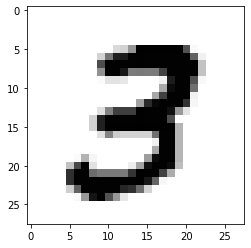

label:  5


In [16]:
digit = train_images[7]

import matplotlib.pyplot as plt

print("image:")
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("label: ", train_labels[0])

### Numpy (manipulando tensores no Numpy)

Fatia tensora:

In [17]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [18]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [19]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


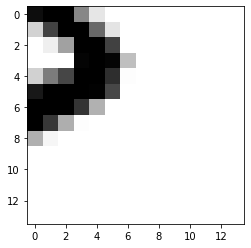

In [20]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

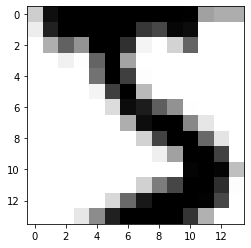

In [21]:
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

### Lote de dados (Data batches) 


Em dados de aprendizagem profunda, geralmente o primeiro eixo (índice = 0) é chamado de "eixo da amostra" (ou "dimensão da amostra").

No aprendizado profundo, geralmente não processamos todo o conjunto de dados de uma vez, mas sim lote por lote.

No MNIST, um de nossos lotes contém 128 dados:

In [22]:
# O primeiro lote
batch = train_images[:128]
# Segundo lote
batch = train_images[128:256]
# Lote n
n = 12
batch = train_images[128 * n : 128 * (n+1)]